In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


We are tasked with building a model to predict which tweets are about a real disaster and which ones are not. Each tweet is labeled as a disaster tweet or not. The goal is to use natural language processing (NLP) techniques to train a model that can accurately classify these tweets.

Natural language processing (NLP) focuses on the interaction between computers and humans through natural language. The ultimate objective of NLP is to read, decipher, understand, and make sense of the human language in a valuable way. This includes many different techniques for interpreting human language, ranging from statistical and machine learning methods to rules-based and algorithmic approaches.

The data includes 10,000 tweets that were hand classified.
Each tweet is labeled with a target indicating if it is a disaster tweet or not. If a tweet is about a real disaster, it is labeled as 1. If not, it is labeled as 0.
The tweets are in English.
Each row in the dataset represents a tweet and contains the following columns:
* id: a unique identifier for each tweet
* text: the text of the tweet
* location: the location the tweet was sent from (may be blank)
* keyword: a particular keyword from the tweet (may be blank)
* target: in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

The challenge of this competition is to use the text and any other useful features to predict whether a new tweet is about a real disaster or not. This is a binary classification problem. The goal is to maximize the accuracy of these predictions.

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan
0    4342
1    3271
N

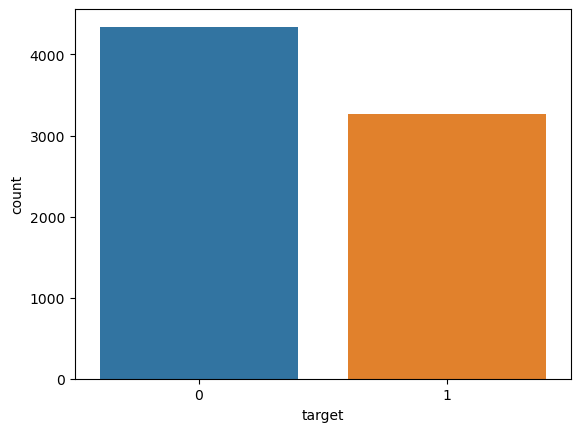

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id             0
keyword       26
location    1105
text           0
dtype: int64
id          0
keyword     0
location    0
text        0
target      0
dtype: int64
id          0
keyword     0
location    0
text        0
dtype: int64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the datasets
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

# Inspect the first few rows of the training data
print(train.head())

# Inspect the first few rows of the testing data
print(test.head())

# Check the balance of the classes in the target variable
print(train['target'].value_counts())

# Visualize the balance of classes
sns.countplot(x='target', data=train)
plt.show()

# Check for missing values in the training data
print(train.isnull().sum())

# Check for missing values in the testing data
print(test.isnull().sum())

# You can fill missing values with suitable values. Here I'm filling with 'None' and 'Unknown' which may not be the best option.
# You may want to explore more sophisticated techniques for dealing with missing data.
train['location'].fillna('None', inplace=True)
train['keyword'].fillna('Unknown', inplace=True)

test['location'].fillna('None', inplace=True)
test['keyword'].fillna('Unknown', inplace=True)

# Check if there are still any missing values in the training data
print(train.isnull().sum())

# Check if there are still any missing values in the testing data
print(test.isnull().sum())

The dataset contains 7613 entries (tweets). Here's what we know:

* The id, text, and target fields have no missing entries. They are complete for all tweets.
* The keyword field has 61 missing entries.
* The location field has 2533 missing entries, which is a significant portion of the dataset.

The target variable, which indicates whether a tweet is about a real disaster (1) or not (0), has more instances of class 0 (4342 entries) than class 1 (3271 entries). The classes are not exactly balanced, but the imbalance is not severe.

For dealing with missing values, we have a few options:

* For location, since there are many missing values, one option could be to create a new category called 'Unknown' and assign this to all the missing values. Another option is to simply drop this feature if it's not considered critical for the model.
* For keyword, the number of missing values is relatively small. We could replace missing values with the most common keyword, or again, with a placeholder like 'Unknown'. The best approach would depend on how important we expect this feature to be, and could be determined through experimentation.


**Model Architecture**

Given the size and complexity of the task, a good starting point could be an LSTM or GRU model. These models are capable of capturing the sequential nature of the text data and can model longer dependencies compared to vanilla RNNs.

The architecture of the model could be as follows:

Embedding Layer: This layer can convert each word into a dense vector. The model can learn the best representation for each word during training.

LSTM Layer: This layer will receive the word vectors for each word in a tweet and output a sequence of hidden states.

GlobalMaxPooling1D/Dense Layer: This layer will convert the sequence of hidden states into a single vector. This vector will be a learned representation of the original tweet.

Output Layer: A single neuron with a sigmoid activation function can take the vector produced by the previous layer and output the probability that the tweet is about a real disaster.

The model can be trained using a binary cross-entropy loss, as this is a binary classification problem.

Input -> Embedding -> LSTM -> GlobalMaxPooling1D/Dense -> Output

**Texts to Matrix Form**

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic used to reflect how important a word is to a document in a collection or corpus. It's commonly used in information retrieval and text mining.

The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

Here's a brief explanation of its components:

Term Frequency (TF): This summarizes how often a given word appears within a document.

Inverse Document Frequency (IDF): This downscales words that appear a lot across documents. It's a measure of how much information the word provides, i.e., if it's common or rare across all documents.

The TF-IDF value is calculated by multiplying these two components.

In [15]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True)

# Fit and transform the text data
tfidf_features = vectorizer.fit_transform(train['text'])

# Show the shape of the resulting TF-IDF features
tfidf_features.shape

(7613, 21637)

Before building the model, we need to prepare the data appropriately. In this case, we need to tokenize the text data and convert it into sequences of integers. Then, we can pad the sequences so they all have the same length. This preprocessing is required to train the LSTM model.For this task, we can use the Tokenizer and pad_sequences utilities from Keras.

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize a tokenizer with a specified vocabulary size
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train['text'])

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(train['text'])

# Pad the sequences so they all have the same length
X = pad_sequences(sequences, maxlen=100)

# Extract the targets
y = train['target'].values

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

#Build the LSTM Model

# Initialize a sequential model
model = Sequential()

# Add an embedding layer
model.add(Embedding(input_dim=10000, output_dim=100, input_length=100))

# Add an LSTM layer
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
191/191 [==============================] - 22s 117ms/step - loss: 0.0464 - accuracy: 0.9793 - val_loss: 1.1882 - val_accuracy: 0.7098
Epoch 2/10
191/191 [==============================] - 22s 114ms/step - loss: 0.0513 - accuracy: 0.9770 - val_loss: 1.2826 - val_accuracy: 0.7301
Epoch 3/10
191/191 [==============================] - 22s 114ms/step - loss: 0.0471 - accuracy: 0.9785 - val_loss: 1.2706 - val_accuracy: 0.7275
Epoch 4/10
191/191 [==============================] - 21s 111ms/step - loss: 0.0468 - accuracy: 0.9788 - val_loss: 1.1813 - val_accuracy: 0.7275
Epoch 5/10
191/191 [==============================] - 22s 118ms/step - loss: 0.0408 - accuracy: 0.9811 - val_loss: 1.2789 - val_accuracy: 0.7354
Epoch 6/10
191/191 [==============================] - 23s 122ms/step - loss: 0.0374 - accuracy: 0.9814 - val_loss: 1.4535 - val_accuracy: 0.7163
Epoch 7/10
191/191 [==============================] - 21s 112ms/step - loss: 0.0400 - accuracy: 0.9805 - val_loss: 1.3099 - val_ac

In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [33]:
# Convert texts to sequences of integers
test_sequences = tokenizer.texts_to_sequences(test['text'])

# Pad the sequences so they all have the same length
X_test = pad_sequences(test_sequences, maxlen=100)

# Use the model to predict on the test data
y_test_pred = model.predict(X_test)

# Convert probabilities to binary outputs
y_test_pred = (y_test_pred > 0.5).astype(int)

102/102 [==============================] - 2s 17ms/step


In [34]:
# Create a dataframe for submission
submission = pd.DataFrame({'id': test['id'], 'target': y_test_pred.squeeze()})

# Save the submission dataframe to a csv file
submission.to_csv('submission.csv', index=False)

Lets run some hyper-parameter tuning.  In this case lets try different number of units in the LSTM layer and plot the validation accuracy for each one over the epochs.

Epoch 1/10
191/191 [==============================] - 25s 109ms/step - loss: 0.5651 - accuracy: 0.7076 - val_loss: 0.4674 - val_accuracy: 0.7912
Epoch 2/10
191/191 [==============================] - 21s 108ms/step - loss: 0.3477 - accuracy: 0.8647 - val_loss: 0.4653 - val_accuracy: 0.7840
Epoch 3/10
191/191 [==============================] - 20s 105ms/step - loss: 0.2453 - accuracy: 0.9131 - val_loss: 0.4870 - val_accuracy: 0.7938
Epoch 4/10
191/191 [==============================] - 20s 105ms/step - loss: 0.1864 - accuracy: 0.9374 - val_loss: 0.5467 - val_accuracy: 0.7820
Epoch 5/10
191/191 [==============================] - 19s 100ms/step - loss: 0.1463 - accuracy: 0.9498 - val_loss: 0.5805 - val_accuracy: 0.7761
Epoch 6/10
191/191 [==============================] - 20s 102ms/step - loss: 0.1134 - accuracy: 0.9622 - val_loss: 0.7040 - val_accuracy: 0.7459
Epoch 7/10
191/191 [==============================] - 19s 99ms/step - loss: 0.0949 - accuracy: 0.9658 - val_loss: 0.7826 - val_acc

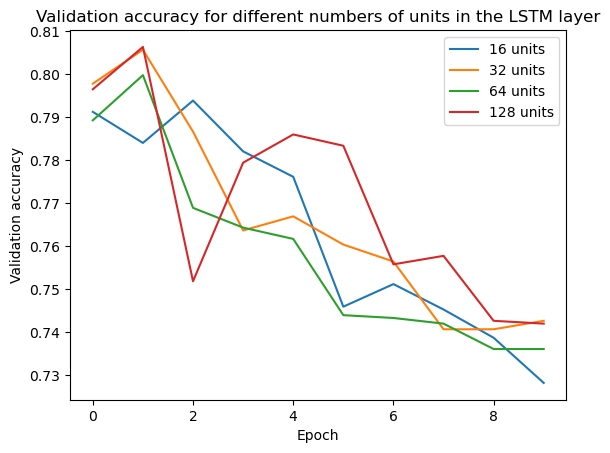

In [36]:
import matplotlib.pyplot as plt

# Define the number of units to test
units_list = [16, 32, 64, 128]

# Initialize a dictionary to hold the validation accuracy for each number of units
val_accuracy_dict = {}

# For each number of units
for units in units_list:
    # Initialize a sequential model
    model = Sequential()

    # Add an embedding layer
    model.add(Embedding(input_dim=10000, output_dim=100, input_length=100))

    # Add an LSTM layer with the current number of units
    model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))

    # Add the output layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model and save the history
    history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

    # Save the validation accuracy for this number of units
    val_accuracy_dict[units] = history.history['val_accuracy']

# Plot the validation accuracy for each number of units
for units, val_accuracy in val_accuracy_dict.items():
    plt.plot(val_accuracy, label=f'{units} units')

plt.title('Validation accuracy for different numbers of units in the LSTM layer')
plt.xlabel('Epoch')
plt.ylabel('Validation accuracy')
plt.legend()
plt.show()

**Conclusion**

The performance of this model couldve not been improved using the other unit values we tested as the validation accuracy fell off faster for all the other unit values.  Other things we could have tried included better pre-processing the text, imcreasing the model complexity, and trying to tune additional hyper parameters. 